# Visualize differences in users

In [1]:
import pandas as pd
import numpy as np
import json
import pickle

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('../Cole.mplstyle')

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.metrics import make_scorer
from collections import defaultdict
from sklearn import svm
from sklearn import metrics
import lightgbm as lgb
from scipy.stats import zscore

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

/Users/scott/anaconda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/Users/scott/anaconda/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_9.4.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [3]:
all_users = np.arange(1,76)
all_sess = [0, 1, 2]
all_tasks = [0, 1]

N_char_trial = 100

# Load feature matrix

In [4]:
df_feat = pd.read_csv('../processed_data/lgbm_v4_feat_matrix.csv', index_col=0)

# Impute nan

In [5]:
# Get values to impute
df_train_all = df_feat.copy()
df_train_all.drop(['user', 'sess', 'task', 'trial'], inplace=True, axis=1)
imputing_dict = dict(df_train_all.mean())

# Impute
for col in imputing_dict.keys():
    df_feat[col].fillna(imputing_dict[col], inplace=True)

In [6]:
# Normalize features
df_feat_norm = df_feat.apply(zscore)
df_feat_norm[['user', 'sess', 'task', 'trial']] = df_feat[['user', 'sess', 'task', 'trial']]

# Tsne visualization

In [7]:
# Compute feat matrix
users_use = np.arange(10)
df_temp = df_feat_norm[df_feat_norm['user'].isin(users_use)]
df_temp = df_temp.drop(['user', 'sess', 'task', 'trial'], axis=1)
X = df_temp.values
y = df_feat_norm[df_feat_norm['user'].isin(users_use)]['user'].values

# Apply pca
pca = PCA(n_components=200)
pca.fit(X)
X_pca = pca.transform(X)
print('Explained variance:', sum(pca.explained_variance_ratio_))

Explained variance: 0.7086237119980909


In [8]:
# Compute tsne
tsne = TSNE(n_components=2, random_state=0)
X_embedded = tsne.fit_transform(X_pca)

### Plot users in color

([], <a list of 0 Text yticklabel objects>)

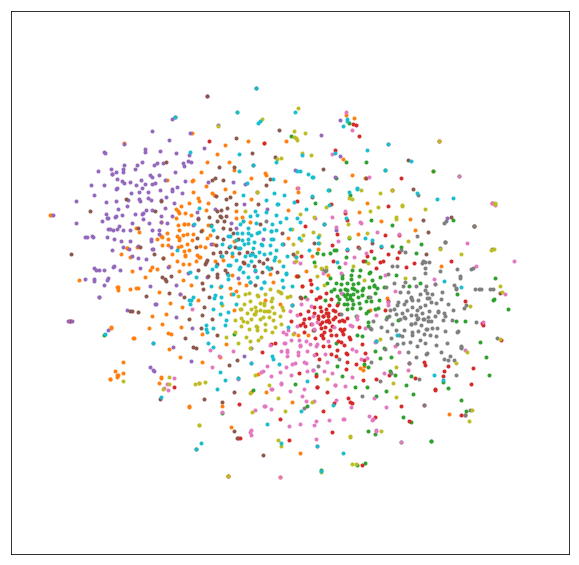

In [10]:
plt.figure(figsize=(10,10))
for user_i in users_use:
    idx_use = y == user_i
    plt.plot(X_embedded[idx_use, 0], X_embedded[idx_use, 1], '.')
plt.xlim((-50,50))
plt.ylim((-50,50))
plt.xticks([])
plt.yticks([])